<a href="https://colab.research.google.com/github/MakonorDaniel/LinkedIn_Connection_Data_Analysis/blob/main/LinkedIn_Connection_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
lkd = pd.read_csv('/content/Connections.csv')
lkd

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Fakolade,Oluwatoyin,NaN,adebola Sobanjo & co,Executive Secretary,4-Mar-22
1,Abosede,Onifade,NaN,DelonApps,Director,25-Feb-22
2,chukwunedum,ossai,NaN,Relentech Specialist nigeria limited,Field Engineer,25-Feb-22
3,Mike,Sabev,NaN,MongoDB,Corporate Account Executive,22-Feb-22
4,Chidiebere,Nnanna,NaN,Remotebase,Recruiter,22-Feb-22
...,...,...,...,...,...,...
3285,Modupe,Phillips,NaN,Aig-Imoukhuede Foundation,"Head, Capacity Buidling",31-Aug-13
3286,Sandra,Dare,NaN,RBC,Senior Advisor - Sales & Client Communications,31-Aug-13
3287,Maxwell,Udoba,NaN,250studio,Software Engineer,31-Aug-13
3288,Tomiwa Allan,Ogunmodede,NaN,Awesome REI,Senior Visual Designer,31-Aug-13


**Here's my connection activity overtime?**

In [ ]:
lkd = lkd.sort_values(by='Connected On')

import plotly.express as px

px.line(lkd.groupby(by='Connected On').count().reset_index(),
        x = 'Connected On',
        y = 'First Name',
        labels = {'First Name': 'Number of Connections'},
        title = 'Connection Timeline'
        
       )

**Wow, so my connections work here?**

In [ ]:
lkd['Company']

1076                    Mobil Producing Nigeria Unlimited
139                                                 Tunga
868                                                   NaN
203                                    StartupList Africa
684                              Therapeutic laboratories
                              ...                        
1852                                    Heritage Bank Plc
1853    Oyo State Hospitals Management Board- Oni Memo...
1850                                            Meta-Frux
1849                       HBO Integrated Concept Nig Ltd
88                                  Grand Cereals Limited
Name: Company, Length: 3290, dtype: object

In [ ]:
group_company = lkd.groupby(by='Company').count().reset_index()
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,-,1,1,0,1,1
1,Inno Ways Marketing,1,1,0,1,1
2,Jigawa State Institute of Information Technology,1,1,0,1,1
3,Nigerian National Petroleum Corporation,2,2,0,2,2
4,Oasis Management Company Ltd,1,1,0,1,1
...,...,...,...,...,...,...
2641,yummyAFRiKA iNt!,1,1,1,1,1
2642,yusuf ali & co,1,1,0,1,1
2643,“TTt AUDIT” LLC,1,1,0,1,1
2644,先亿园林机械，070，381油锯配件工厂15168783188,1,1,0,1,1


In [ ]:
group_company = group_company.sort_values(by = 'Connected On', ascending=False).reset_index(drop=True)
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Self employed,20,20,1,20,20
1,Quabbly,17,17,0,17,17
2,Self-employed,16,16,1,16,16
3,Telnet Nigeria Limited,12,12,0,12,12
4,Freelance,10,10,1,10,10
...,...,...,...,...,...,...
2641,Gidi Collections Enterprise,1,1,0,1,1
2642,Gidi Mobile,1,1,0,1,1
2643,Giggz,1,1,0,1,1
2644,Gijima,1,1,0,1,1


In [ ]:
fig = px.bar(group_company[:100],
        x = 'Company',
        y = 'Connected On',
        labels = {'Connected On': 'Number of Connections'},
        width = 1000,
        height = 900,
        title = 'Bar graph showing where my connections work'
    
)

fig

In [ ]:
fig = px.treemap(group_company[:500], path = ['Company','Position'],
        values = 'Connected On',
        labels = {'Connected On': 'Number of Connections'},
        width = 1000,
        height = 900,
        title = 'Tree Map showing where my connections work'
    
)

fig

In [ ]:
lkd['Position'].value_counts()

CEO                                                        64
Chief Executive Officer                                    58
Founder                                                    44
Software Engineer                                          39
Data Analyst                                               29
                                                           ..
Cadet Engineer                                              1
Public Relations Officer                                    1
Head Of Information and Communications Technology (ICT)     1
CEO/MD/chef                                                 1
Commercial Finance Data Analyst                             1
Name: Position, Length: 2062, dtype: int64

In [ ]:
lkd['Position'].value_counts()/len(lkd)*100 > 0.20

CEO                                                         True
Chief Executive Officer                                     True
Founder                                                     True
Software Engineer                                           True
Data Analyst                                                True
                                                           ...  
Cadet Engineer                                             False
Public Relations Officer                                   False
Head Of Information and Communications Technology (ICT)    False
CEO/MD/chef                                                False
Commercial Finance Data Analyst                            False
Name: Position, Length: 2062, dtype: bool

In [ ]:
lkd['Position'].value_counts()[lkd['Position'].value_counts()/len(lkd)*100 > 0.20]

CEO                                64
Chief Executive Officer            58
Founder                            44
Software Engineer                  39
Data Analyst                       29
Managing Director                  28
Project Manager                    24
Director                           20
Co-Founder                         16
Graduate Research Assistant        16
Senior Software Engineer           15
Business Development Manager       15
Creative Director                  14
Accountant                         14
Manager                            13
MD/CEO                             13
Customer Service Representative    12
President                          12
Software Developer                 12
Operations Manager                 12
Executive Director                 11
Human Resources Manager            10
Social Media Manager                9
Product Manager                     9
Teacher                             9
Team Lead                           8
Digital Mark

In [ ]:
fig = px.bar(lkd.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:50].reset_index(),
       x='Position',
       y='Connected On',
       labels={'Connected On': 'Number Of Connections'},
        title= 'The Various Positions Occupied By My LinkedIn Network'
      )

fig.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


def CreateWordCloud(text):
    
    
    wordcloud = WordCloud(width = 1000, height = 900, 
                background_color='black',
                min_font_size = 10,
                colormap='Set2').generate(text) 
    
    
    fig = plt.figure(figsize = (15, 10)) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    # plt.axis("off") 
    # plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

In [ ]:
positions = ' '.join(lkd[~lkd.Position.isnull()].Position.unique())

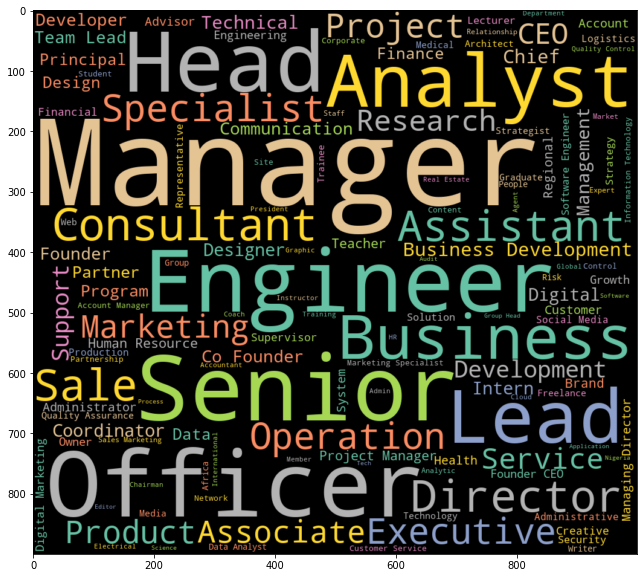

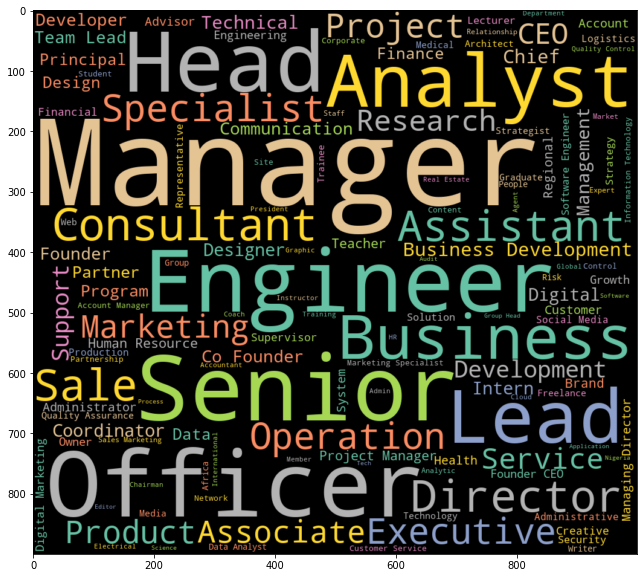

In [ ]:
CreateWordCloud(positions)